In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
data = pd.read_excel('/content/test dataset.xlsx', parse_dates=True)

In [3]:
features = ['RealPower','LineVoltageVRY','LineVoltageVYB','LineVoltageVBR','LineCurrentIR','LineCurrentIY','LineCurrentIB','PowerFactor','Frequency','days','season']

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=features, index=data.index)

In [5]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data.iloc[i + seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 24
X, y = create_sequences(scaled_data, seq_length)


In [7]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
414/414 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: nan - val_loss: nan
Epoch 2/50


KeyboardInterrupt: 

In [ ]:
predictions = model.predict(X_test)

19/19 [==============================] - 1s 9ms/step


In [ ]:
print(y_test)

[0.31656554 0.32680359 0.29608945 0.29608945 0.19521981 0.2130642
 0.19521981 0.17463708 0.28518783 0.36013648 0.33628918 0.33009777
 0.37210694 0.3850698  0.32732615 0.29976875 0.35140333 0.33135383
 0.33135383 0.30139682 0.32132907 0.31845648 0.31523215 0.30127957
 0.31717548 0.31717548 0.31717548 0.28005508 0.25002292 0.25002292
 0.2735882  0.23643892 0.3216222  0.30825586 0.30485565 0.2945964
 0.29704926 0.29704926 0.28049009 0.26021887 0.31434019 0.31434019
 0.27394256 0.3009629  0.28457165 0.28457165 0.28791323 0.29125482
 0.23629455 0.29102032 0.25643199 0.28756149 0.24804248 0.19836775
 0.16193962 0.13676547 0.30544439 0.29539905 0.28535372 0.27879871
 0.27766334 0.27449357 0.24676553 0.25668956 0.31838414 0.29723699
 0.26875556 0.27547865 0.31426048 0.29834461 0.27606239 0.250597
 0.27442964 0.28123006 0.25083337 0.25083337 0.2481011  0.20946895
 0.23200437 0.25107067 0.246401   0.246401   0.23641741 0.2359297
 0.25685483 0.25685483 0.22257646 0.24293468 0.23046455 0.21985043


In [ ]:
print(predictions)

[[0.2891606 ]
 [0.33466798]
 [0.34128973]
 [0.3381016 ]
 [0.35147053]
 [0.3330876 ]
 [0.31545565]
 [0.30320776]
 [0.29762882]
 [0.378727  ]
 [0.37648025]
 [0.35763326]
 [0.34799084]
 [0.33976087]
 [0.36088848]
 [0.37602645]
 [0.40520662]
 [0.4263592 ]
 [0.41841468]
 [0.44396642]
 [0.45771304]
 [0.40723836]
 [0.36123908]
 [0.3523156 ]
 [0.35588908]
 [0.35693404]
 [0.35064209]
 [0.35418904]
 [0.37401393]
 [0.37302658]
 [0.3670623 ]
 [0.3627748 ]
 [0.3928447 ]
 [0.41318524]
 [0.4040183 ]
 [0.39059222]
 [0.39706343]
 [0.37318093]
 [0.35418883]
 [0.34013206]
 [0.33592778]
 [0.33573827]
 [0.34351912]
 [0.36205265]
 [0.39258954]
 [0.41383344]
 [0.40063438]
 [0.4337258 ]
 [0.4525023 ]
 [0.40746972]
 [0.3555826 ]
 [0.31688848]
 [0.28176376]
 [0.28550136]
 [0.28215778]
 [0.2816609 ]
 [0.29001594]
 [0.33398002]
 [0.32722035]
 [0.33125374]
 [0.3454483 ]
 [0.3669561 ]
 [0.36380538]
 [0.3597954 ]
 [0.3646412 ]
 [0.36177754]
 [0.3461056 ]
 [0.3400801 ]
 [0.35220927]
 [0.33984894]
 [0.3321586 ]
 [0.34

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
rmse = math.sqrt(mse)
mape=np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f'Test Mean Squared Error (MSE): {mse}')
print(f'Test Mean Absolute Error (MAE): {mae}')
print(f'Test R-squared (R²): {r2}')
print(f'Test Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Test Root Mean Squared Error (RMSE): {rmse}')


Test Mean Squared Error (MSE): 0.0066631504321828655
Test Mean Absolute Error (MAE): 0.05293689466744722
Test R-squared (R²): -0.9022812907289532
Test Mean Absolute Percentage Error (MAPE): 26.94534338643237
Test Root Mean Squared Error (RMSE): 0.0816281228020274


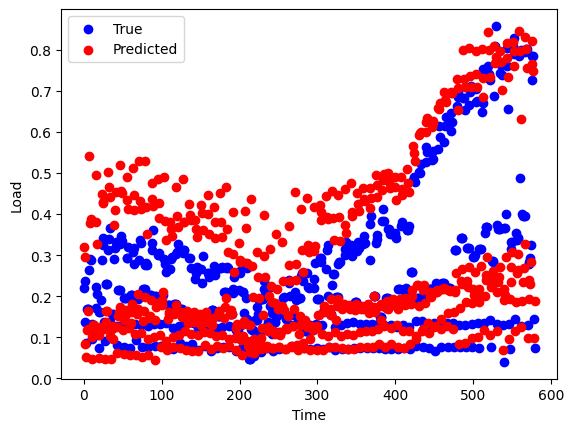

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='True')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

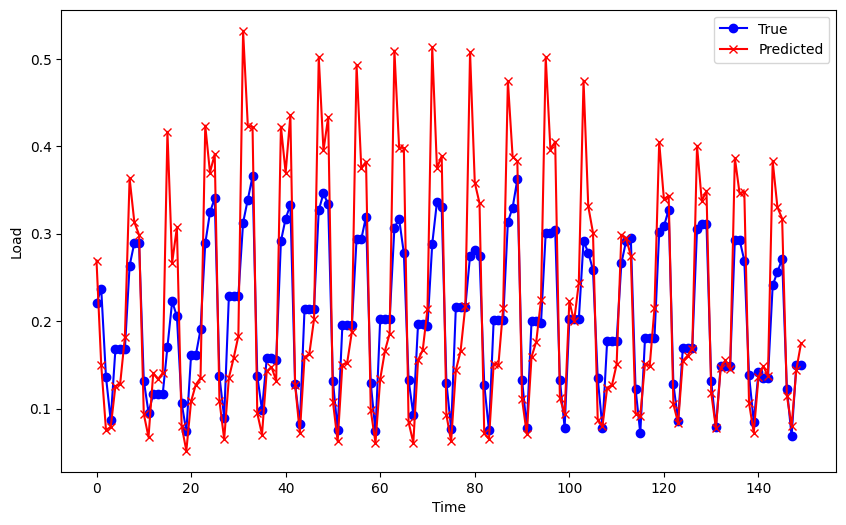

In [ ]:
import matplotlib.pyplot as plt

# Define the number of points to display
num_points = 150

# Ensure we only take the first 150 points
y_test_subset = y_test[:num_points]
predictions_subset = predictions[:num_points]

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_subset)), y_test_subset, color='blue', marker='o', linestyle='-', label='True')
plt.plot(range(len(predictions_subset)), predictions_subset, color='red', marker='x', linestyle='-', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()
